In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as s
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle

In [2]:
df=pd.read_csv('data.csv')

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['pay_schedule']=le.fit_transform(df['pay_schedule'])


Q1 = df.quantile(0.05)
Q3 = df.quantile(0.80)
IQR = Q3 - Q1

index_outliers= df.loc[((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)].index.tolist() #Index of the outliers 
outlier_values=df.loc[index_outliers]    #List of values of outliers
remove_outliers=df[~((df< (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]   # Removing outliers from dataframe and get the dataframe without outliers

df=remove_outliers.reset_index()
df=df.drop(['index'],axis=1)   # Resetting the index

# X = mms.transform(X)


df.dropna(subset=['income'],inplace=True)

X = df.drop(labels='e_signed',axis=1)
Y= df['e_signed'] 


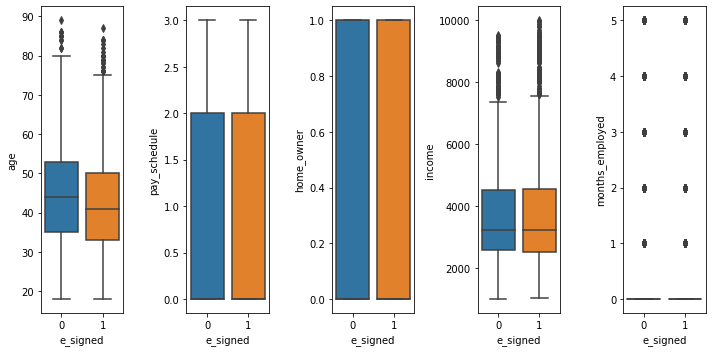

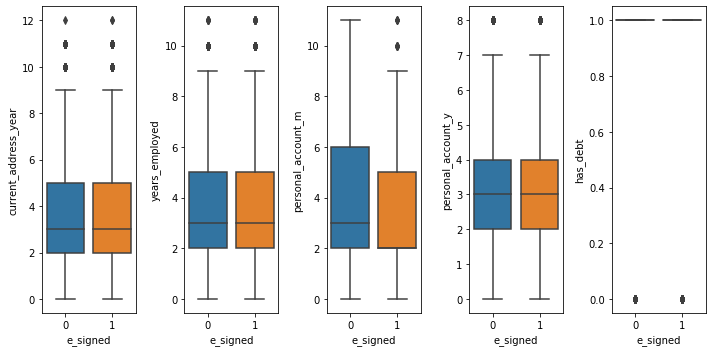

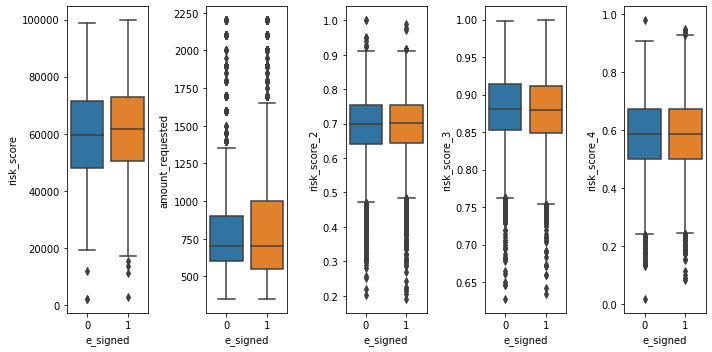

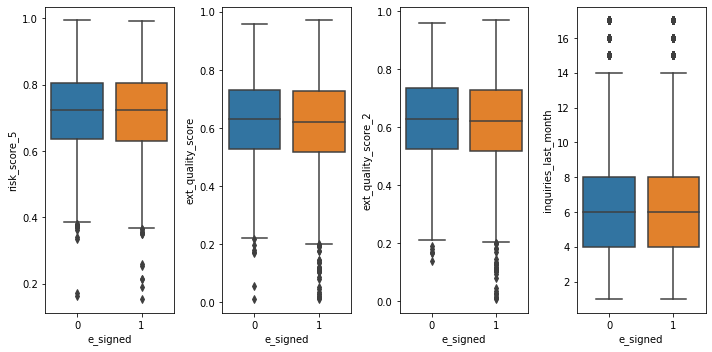

In [3]:
plt.rcParams['figure.figsize']=(10,5)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

s.boxplot('e_signed',y='age',data=df, ax=ax1)
s.boxplot('e_signed',y='pay_schedule',data=df, ax=ax2)
s.boxplot('e_signed',y='home_owner',data=df, ax=ax3)
s.boxplot('e_signed',y='income',data=df, ax=ax4)
s.boxplot('e_signed',y='months_employed',data=df, ax=ax5)
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('e_signed',y='years_employed',data=df, ax=ax2)
s.boxplot('e_signed',y='current_address_year',data=df, ax=ax1)
s.boxplot('e_signed',y='personal_account_m',data=df, ax=ax3)
s.boxplot('e_signed',y='personal_account_y',data=df, ax=ax4)
s.boxplot('e_signed',y='has_debt',data=df, ax=ax5)    
f.tight_layout()

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)
s.boxplot('e_signed',y='amount_requested',data=df, ax=ax2)
s.boxplot('e_signed',y='risk_score',data=df, ax=ax1)
s.boxplot('e_signed',y='risk_score_2',data=df, ax=ax3)
s.boxplot('e_signed',y='risk_score_3',data=df, ax=ax4)
s.boxplot('e_signed',y='risk_score_4',data=df, ax=ax5)    
f.tight_layout()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
s.boxplot('e_signed',y='risk_score_5',data=df, ax=ax1)
s.boxplot('e_signed',y='ext_quality_score',data=df, ax=ax2)
s.boxplot('e_signed',y='ext_quality_score_2',data=df, ax=ax3)
s.boxplot('e_signed',y='inquiries_last_month',data=df, ax=ax4)   
f.tight_layout()

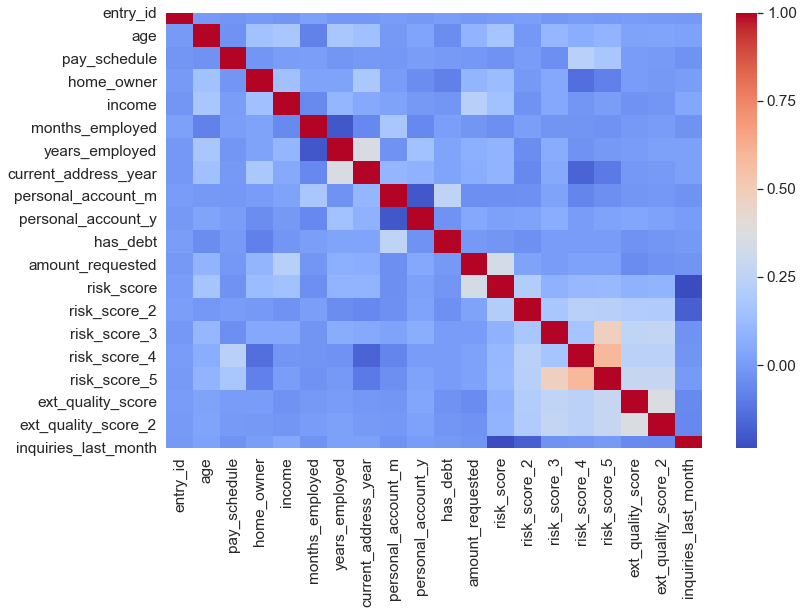

In [4]:
#Explore correlations
plt.rcParams['figure.figsize']=(12,8)
s.set(font_scale=1.4)
s.heatmap(df.drop('e_signed', axis=1).corr(), cmap='coolwarm')

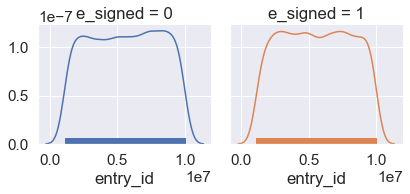

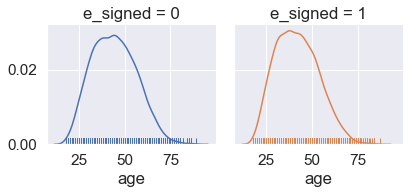

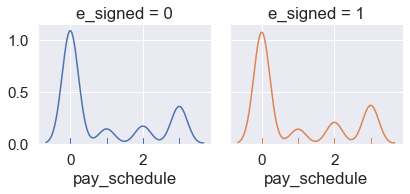

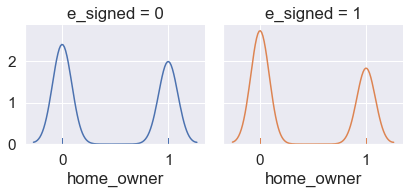

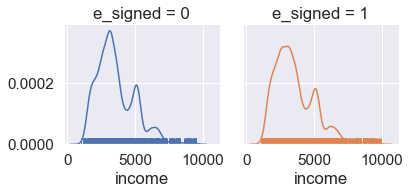

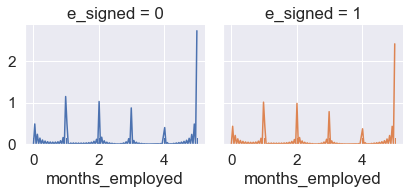

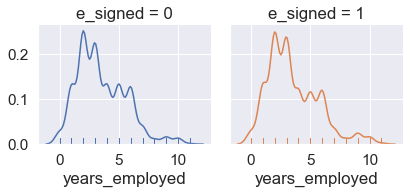

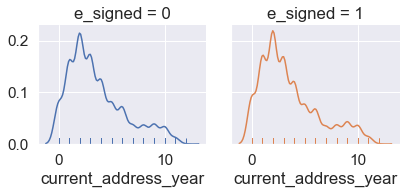

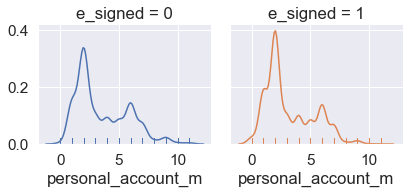

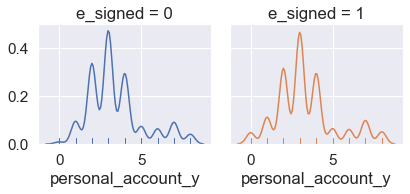

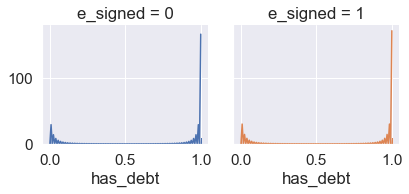

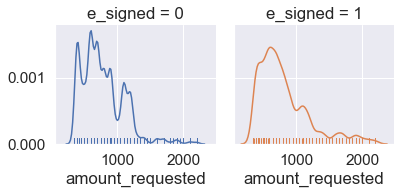

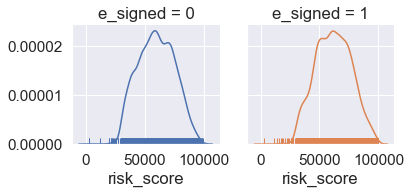

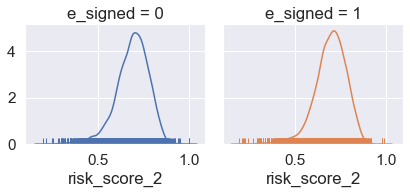

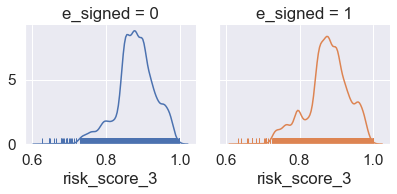

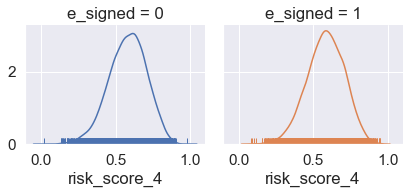

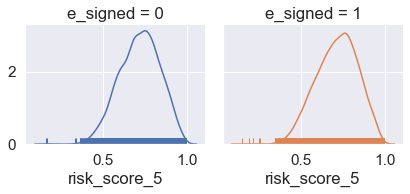

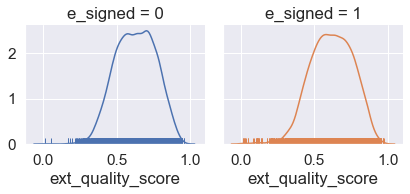

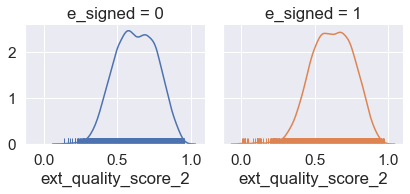

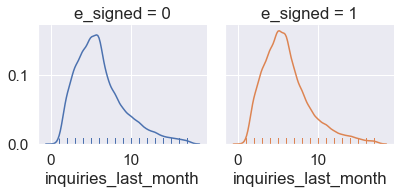

In [5]:
for cols in X.columns:
    g = s.FacetGrid(df, col='e_signed', hue='e_signed')
    g.map(s.distplot, cols , hist=False, rug=True)

In [6]:
skewedcol=['pay_schedule','home_owner','income','months_employed','years_employed',
 'current_address_year','personal_account_m','personal_account_y','has_debt','amount_requested','risk_score_3']


In [7]:
for s in skewedcol:
    X[s]=np.sqrt(X[s])

In [8]:
df_norm = (X - X.mean()) / (X.max() - X.min())
df_norm = pd.concat([df_norm, Y], axis=1)

In [9]:
Y.tail()

14582    0
14583    0
14584    0
14585    1
14586    1
Name: e_signed, dtype: int64

In [10]:
X.tail()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
14582,9949728,31,1.000000,0.0,56.964901,0.0,2.236068,1.732051,1.414214,2.449490,1.0,26.457513,71700,0.691126,0.963429,0.664112,0.838012,0.727705,0.627705,2
14583,9442442,46,0.000000,0.0,80.777472,0.0,1.414214,1.000000,1.732051,1.732051,1.0,28.284271,51800,0.648525,0.985308,0.699241,0.844724,0.774918,0.474918,3
14584,9857590,46,1.732051,0.0,51.816986,0.0,2.236068,1.000000,1.000000,2.828427,1.0,34.641016,59650,0.677975,0.958197,0.687981,0.939101,0.472045,0.672045,9
14585,8708471,42,0.000000,0.0,50.149776,0.0,1.732051,2.236068,2.449490,1.000000,1.0,20.000000,80200,0.642741,0.941108,0.456448,0.686823,0.406568,0.406568,3
14586,1498559,29,1.732051,1.0,51.623638,0.0,2.000000,3.162278,2.000000,1.000000,1.0,24.494897,64950,0.720889,0.935078,0.505565,0.631619,0.846163,0.846163,4


In [11]:
X.drop('risk_score_4',axis=1).head()

,entry_id,age,pay_schedule,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month
0,7629673,40,0.000000,1.0,55.991071,0.0,1.732051,1.732051,2.449490,1.414214,1.0,23.452079,36200,0.737398,0.950535,0.515977,0.580918,0.380918,10
1,3560428,61,1.732051,0.0,56.391489,0.0,2.449490,1.732051,1.414214,2.645751,1.0,24.494897,30150,0.738510,0.938630,0.826402,0.730720,0.630720,9
2,5682812,40,0.000000,0.0,72.318739,0.0,2.449490,1.000000,1.414214,2.645751,1.0,26.457513,42150,0.665224,0.980221,0.778831,0.792552,0.592552,8
3,5335819,33,1.414214,0.0,59.916609,0.0,2.236068,1.414214,1.414214,2.828427,1.0,33.166248,53850,0.617361,0.926045,0.665523,0.744634,0.744634,12
4,8492423,21,1.732051,0.0,47.989582,0.0,2.236068,2.828427,1.414214,2.645751,1.0,24.494897,74850,0.677109,0.871071,0.664762,0.592556,0.492556,6


In [12]:
X.isnull().sum()

entry_id                0
age                     0
pay_schedule            0
home_owner              0
income                  0
months_employed         0
years_employed          0
current_address_year    0
personal_account_m      0
personal_account_y      0
has_debt                0
amount_requested        0
risk_score              0
risk_score_2            0
risk_score_3            0
risk_score_4            0
risk_score_5            0
ext_quality_score       0
ext_quality_score_2     0
inquiries_last_month    0
dtype: int64

In [13]:
X_norm = df_norm.drop(labels='e_signed',axis=1)
Y_norm= df_norm['e_signed']

In [14]:
# Functionalize model fittting

def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    pickle.dump(grid_result,open(algo_name,'wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)

In [16]:
param ={
            'C': [0.1, 1, 100],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }
FitModel(X_norm,Y_norm,'SVC_norm',SVC(),param,cv=3)

Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:  2.9min finished


[0 1 1 ... 1 0 1]
Best Params : {'C': 100, 'gamma': 0.1}
Classification Report :               precision    recall  f1-score   support

           0       0.59      0.49      0.54      1377
           1       0.61      0.70      0.65      1541

    accuracy                           0.60      2918
   macro avg       0.60      0.60      0.59      2918
weighted avg       0.60      0.60      0.60      2918

Accuracy Score : 0.6010966415352982
Confusion Matrix : 
 [[ 680  697]
 [ 467 1074]]


In [26]:
param ={
            'n_estimators': [100,500, 1000, 2000],
           
        }
FitModel(X_norm,Y_norm,'Random Forest',RandomForestClassifier(),param,cv=10)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.4min finished


[0 1 1 ... 1 1 0]
Best Params : {'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.62      0.54      0.58      1377
           1       0.63      0.70      0.67      1541

    accuracy                           0.63      2918
   macro avg       0.63      0.62      0.62      2918
weighted avg       0.63      0.63      0.63      2918

Accuracy Score : 0.6285126799177518
Confusion Matrix : 
 [[ 748  629]
 [ 455 1086]]


In [22]:
np.random.seed(10)

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)


forest = RandomForestClassifier(n_estimators=1000)
fit = forest.fit(x_train, y_train)
accuracy = fit.score(x_test, y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix(y_test, predict)

#--------------------------------------------------------------------------------------#
# Perform k fold cross-validation


print ('Accuracy of Random Forest: %s' % "{0:.2%}".format(accuracy))


Accuracy of Random Forest: 62.92%


In [23]:
#%%Feature importances
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("feature %s (%f)" % (list(X)[f], importances[indices[f]]))

Feature ranking:
feature entry_id (0.082109)
feature age (0.073072)
feature pay_schedule (0.071241)
feature home_owner (0.069073)
feature income (0.068952)
feature months_employed (0.068643)
feature years_employed (0.067768)
feature current_address_year (0.067592)
feature personal_account_m (0.066794)
feature personal_account_y (0.066451)
feature has_debt (0.064582)
feature amount_requested (0.041254)
feature risk_score (0.037557)
feature risk_score_2 (0.037155)
feature risk_score_3 (0.036617)
feature risk_score_4 (0.034306)
feature risk_score_5 (0.016356)
feature ext_quality_score (0.013930)
feature ext_quality_score_2 (0.008324)
feature inquiries_last_month (0.008224)


In [24]:
feat_imp = pd.DataFrame({'Feature':list(X),
                        'Gini importance':importances[indices]})
plt.rcParams['figure.figsize']=(12,12)
s.set_style('whitegrid')
ax = s.barplot(x='Gini importance', y='Feature', data=feat_imp)
ax.set(xlabel='Gini Importance')
plt.show()

AttributeError: 'str' object has no attribute 'set_style'

In [25]:
param ={
            'n_estimators': [500, 1000, 2000],
           
        }
FitModel(X_norm,Y_norm,'XGBoost_norm',XGBClassifier(),param,cv=5)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished


[0 1 1 ... 1 0 0]
Best Params : {'n_estimators': 500}
Classification Report :               precision    recall  f1-score   support

           0       0.62      0.56      0.59      1377
           1       0.64      0.70      0.67      1541

    accuracy                           0.63      2918
   macro avg       0.63      0.63      0.63      2918
weighted avg       0.63      0.63      0.63      2918

Accuracy Score : 0.6329677861549006
Confusion Matrix : 
 [[ 767  610]
 [ 461 1080]]
